# Theroy and Concepts

## 1. Explain the concept of Batch Normalization in the context of ANN.

- Batch Normalization helps stabilize and optimize the training process of ANNs by normalizing the inputs and reducing the internal covariate shift, leading to faster convergence, improved performance, and better generalization.

---

## 2. Describe the benifits of using Batch Normalization during Training. 

- Batch Normalization provides significant benefits during training by stabilizing the network, reducing sensitivity to weight initialization, allowing for higher learning rates, mitigating gradient problems, improving model generalization, and simplifying the hyperparameter tuning process. It has become a standard technique in deep learning to improve the training and performance of neural networks.

---

## 3. Discuss the working principle of Batch Normalization, Including the normalization step and the learnable parameters

- The working principle of Batch Normalization involves two key steps: the normalization step and the learnable parameters.

1. Normalization Step:
- Given a mini-batch of inputs to a layer, Batch Normalization calculates the mean (μ) and variance (σ^2) of the batch.
- It then normalizes the inputs by subtracting the mean and dividing by the standard deviation (σ) to ensure they have zero mean and unit variance.
- The normalized inputs are then scaled by a learnable parameter (γ) and shifted by another learnable parameter (β).

2. Learnable Parameters:
- The learnable parameters γ and β are introduced to allow the network to learn the optimal scale and shift for the normalized inputs.
- These parameters are adjusted during training using gradient descent to minimize the overall loss of the network.
- By adjusting γ and β, the network can learn to scale and shift the normalized inputs, effectively learning the optimal representation of the data.

---
---

# Implementation

## 1. Choose a dataset of your choice. (i.e, MINIST, CIFAR-10) and preprocess it.

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
cifar = tf.keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data()

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [5]:
len(X_train_full[5000:] )


45000

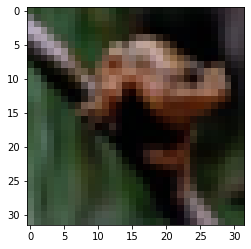

In [6]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

---

## 2. Implementation of simple feedforward neural network using any deep learning framework/library(i.e, TenseroFlow, PyTorch).

In [7]:
# Creating layers of ANN with out batch normalization

LAYERS1 = [tf.keras.layers.Flatten(input_shape=[32, 32, 3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf1 = tf.keras.models.Sequential(LAYERS1)

In [8]:
# Creating layers of ANN with batch normalization

LAYERS2 = [tf.keras.layers.Flatten(input_shape=[32, 32, 3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf2 = tf.keras.models.Sequential(LAYERS2)

In [9]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf1.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

model_clf2.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

---

## 3. Train the neural network on the choosen dataset without using batch normalization.

In [12]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

his1 = model_clf1.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/10
1407/1407 [==============================] - 21s 13ms/step - loss: 1.3536 - accuracy: 0.5196 - val_loss: 1.7022 - val_accuracy: 0.4184
Epoch 2/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3287 - accuracy: 0.5294 - val_loss: 1.4897 - val_accuracy: 0.4736
Epoch 3/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3102 - accuracy: 0.5355 - val_loss: 1.5338 - val_accuracy: 0.4596
Epoch 4/10
1407/1407 [==============================] - 16s 12ms/step - loss: 1.2907 - accuracy: 0.5416 - val_loss: 1.4697 - val_accuracy: 0.4868
Epoch 5/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2733 - accuracy: 0.5477 - val_loss: 1.4135 - val_accuracy: 0.4926
Epoch 6/10
1407/1407 [==============================] - 15s 11ms/step - loss: 1.2581 - accuracy: 0.5549 - val_loss: 2.1199 - val_accuracy: 0.3380
Epoch 7/10
1407/1407 [==============================] - 15s 11ms/step - loss: 1.2379 - accuracy: 0.5619 - val_loss: 1.4966 -

---

## 4. Implement Batch normalization layer in neural network and train the model again.

In [23]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

his2 = model_clf2.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/10
1407/1407 [==============================] - 21s 15ms/step - loss: 1.3056 - accuracy: 0.5393 - val_loss: 1.5568 - val_accuracy: 0.4676
Epoch 2/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.2928 - accuracy: 0.5458 - val_loss: 1.7894 - val_accuracy: 0.4396
Epoch 3/10
1407/1407 [==============================] - 21s 15ms/step - loss: 1.2789 - accuracy: 0.5503 - val_loss: 1.7123 - val_accuracy: 0.4512
Epoch 4/10
1407/1407 [==============================] - 15s 10ms/step - loss: 1.2587 - accuracy: 0.5574 - val_loss: 1.6141 - val_accuracy: 0.4438
Epoch 5/10
1407/1407 [==============================] - 20s 14ms/step - loss: 1.2515 - accuracy: 0.5576 - val_loss: 1.8107 - val_accuracy: 0.4328
Epoch 6/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.2303 - accuracy: 0.5668 - val_loss: 1.5182 - val_accuracy: 0.4908
Epoch 7/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2258 - accuracy: 0.5660 - val_loss: 1.4876 -

---

## 5. Compare the training and Validation performance

#### with out Batch Normalization

In [19]:
pd.DataFrame(his1.history).tail(1)

,loss,accuracy,val_loss,val_accuracy
9,1.19001,0.5794,1.391457,0.517


<AxesSubplot:>

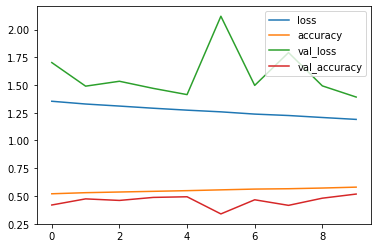

In [20]:
pd.DataFrame(his1.history).plot()

#### with Batch Normalization

In [24]:
pd.DataFrame(his2.history).tail(1)

,loss,accuracy,val_loss,val_accuracy
9,1.185181,0.5826,1.457969,0.5076


<AxesSubplot:>

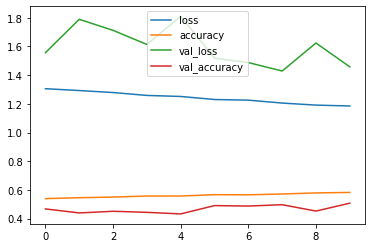

In [25]:
pd.DataFrame(his2.history).plot()

---

## 6. Discuss the impact of batch normalization on the training process and performance of the neural network

- Batch normalization offers several advantages, including faster training, higher learning rates, regularization, improved gradient flow, and increased robustness to initialization. These benefits contribute to better-performing neural networks with improved accuracy and generalization ability. 

---
---

# Experiments and Analysis

## 1. Experiment with different batch sizes and observe the effeect on the training dynamics and model performance.

1. Training Dynamics:

- Larger Batch Size: Training with larger batch sizes often leads to faster convergence initially. The updates to model parameters are computed based on a larger amount of data, which can provide more stable gradient estimates. However, as training progresses, larger batch sizes might converge to slightly suboptimal solutions compared to smaller batch sizes due to reduced exploration of the parameter space. Additionally, larger batch sizes may require more memory and computational resources.
- Smaller Batch Size: Training with smaller batch sizes can exhibit more erratic training dynamics initially. The updates to model parameters are computed based on a smaller subset of data, which can introduce more noise and lead to more fluctuating gradients. Smaller batch sizes may require more training iterations to converge, but they can potentially find better solutions due to increased exploration of the parameter space.

2. Generalization Performance:

- Larger Batch Size: In some cases, larger batch sizes can lead to models that generalize slightly worse compared to smaller batch sizes. This is because larger batch sizes tend to converge to flatter minima, which might generalize less effectively to unseen data. However, the difference in generalization performance between batch sizes is often relatively small.
- Smaller Batch Size: Smaller batch sizes can result in models that generalize better, especially if they explore more of the parameter space due to the inherent noise introduced by the smaller batches. Smaller batch sizes can help the model escape shallow minima and find better optima. However, this may come at the cost of longer training time and potential overfitting if the batch size is too small.

3. Computational Efficiency:

- Larger Batch Size: Training with larger batch sizes can be more computationally efficient, particularly when using hardware accelerators like GPUs. Larger batches allow for better utilization of parallel processing capabilities, as more data can be processed simultaneously.
- Smaller Batch Size: Smaller batch sizes may require more training iterations to achieve convergence, resulting in longer training times. They may also be less efficient in utilizing parallel processing capabilities due to smaller batch computations.

---

## 2. Discuss the advantages and potential limitation of Batch Normalization in improving the training of the neural network.

- Batch normalization offers significant advantages in improving training dynamics, convergence speed, and generalization performance of neural networks.

<br>

- While it has a few potential limitations, they can be managed through careful parameter tuning and consideration of specific architectural requirements.